# Gradient descent
#### Author: Kirill Zakharov

In [32]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [95]:
def f(x, y): #initial function
    return x**2 + x*y + y**2

def partialX(f, x, y, d): #take the partial derivative by X
    return (f(x + d, y) - f(x, y))/d

def partialY(f, x, y, d): #take the partial derivative by Y
    return (f(x, y + d) - f(x, y))/d

def grad(f, x, y, d): #function for finding the gradient
    x0 = partialX(f, x, y, d)
    y0 = partialY(f, x, y, d)
    return (x0, y0) #output is the vector of patial derivatives
    
def grad_descent(f, x, y, d, step, eps):
    k = step #gradient descent step
    x0 = x
    y0 = y
    xmin = x0 - step*grad(f, x0, y0, d)[0]
    ymin = y0 - step*grad(f, x0, y0, d)[1]
    minf = 0
    array = [(xmin, ymin)]
    while abs(f(x0, y0)) - abs(f(xmin, ymin)) > eps: #condition for breaking
        k += 0.1 #changing for the fast convergence
        x0 = xmin
        y0 = xmin
        xmin = x0 - step*grad(f, x0, y0, d)[0]/k #calculate the x component of the gradient
        ymin = y0 - step*grad(f, x0, y0, d)[1]/k #calculate the y component of the gradient
        array.append((xmin, ymin)) #array of every steps
        minf = (xmin, ymin)
    return minf, array

In [96]:
step = 0.1
eps = 0.0001
minf, array = grad_descent(f, 1, 1, 0.001, step, eps)
res = np.array(array).T #transpose array
val = list(map(f,res[0],res[1])) #the values of the function in points
minf # the minimum point

(-0.00033333333333689075, -0.00033333333333689075)

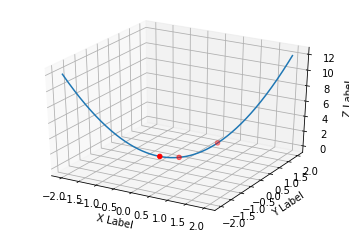

In [97]:
xs = list(res[0])
ys = list(res[1])
zs = val

x1 = np.linspace(-2,2,num=1000)
y1 = np.linspace(-2,2,num=1000)
z1 = list(map(f, x1, y1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1)
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()